<h1>M. Nielsen, Chapter 6, 100-node 1 layer softmax</h1>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import os
import numpy as np
import time
import random
import tensorflow as tf

In [7]:
from matplotlib import pyplot as plt

In [9]:
os.chdir(r"C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211119\multi_layer")

In [11]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

<h1>load data</h1>

In [13]:
###############################################
#    load data from local directory
###############################################

train_x, train_y, val_x, val_y, test_x, test_y = [], [], [], [], [], []

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

for tra in training_data:
    img_tra_x = tra[0].reshape(28,28).tolist()
    img_tra_y = np.array(np.argmax(tra[1]), dtype=np.uint8)
    train_x.append(img_tra_x)
    train_y.append(img_tra_y)
print(np.shape(train_x))

for val in validation_data:
    img_val_x = val[0].reshape(28,28)
#     img_val_y = np.array(np.argmax(val[1]), dtype=np.uint8)
    img_val_y = np.array(val[1], dtype=np.uint8)
    val_x.append(img_val_x)
    val_y.append(img_val_y)
print(np.shape(val_x))

for tes in test_data:
    img_tes_x = tes[0].reshape(28,28)
    img_tes_y = np.array(tes[1], dtype=np.uint8)
    test_x.append(img_tes_x)
    test_y.append(img_tes_y)
print(np.shape(test_x))


train_x = np.array(train_x)
val_x = np.array(val_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [15]:
# ###############################################
# #    checking data format:
# ###############################################
# plt.imshow(train_x[0], interpolation='none')
# plt.show()
# print('img label:', train_y[0])

# plt.imshow(val_x[0], interpolation='none')
# plt.show()
# print('img label:', val_y[0])

# plt.imshow(test_x[0], interpolation='none')
# plt.show()
# print('img label:', test_y[0])


<h1>Trying Implementing 100-node 1 layer softmax using TF, following the example in M. Nielsen, Chapter 6</h1>	
network3.py
https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network3.py

<h2>build the model</h2>

In [16]:
################################################################
#   normal SGD method w. softmax as described in chapter 6
################################################################
tf.random.set_seed(42)
################################################################
#    define model
# I didn't notice any special weight initialization method in M. Nielsen's Network3.py,
# so I will just assume normal(0,1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(
                100, 
                activation=tf.nn.sigmoid,
                kernel_initializer=tf.keras.initializers.RandomNormal(
                    stddev=1.0
                ),
                bias_initializer=tf.keras.initializers.RandomNormal(
                    stddev=1.0
                )
            )
)
model.add(tf.keras.layers.Dense(
                10,
                activation=tf.keras.activations.softmax
            )
)

################################################################
eta = 0.1

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss=loss_fn,
    metrics=['accuracy'])
################################################################
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


<h2>train the model</h2>

In [17]:
################################################################
# save the model when val_acc is best
checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\save_model\100node_softmax\100node_softmax'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
################################################################
#    train model  (how do i randomize mini_batches?)
batch_size = 10
n_eph = 60

ts = time.time()
history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)
te = time.time()

print('total time:', te - ts)


acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)

################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################

Epoch 1/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.5392 - accuracy: 0.8337 - val_loss: 0.3507 - val_accuracy: 0.8922
Epoch 2/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.3466 - accuracy: 0.8950 - val_loss: 0.3033 - val_accuracy: 0.9091
Epoch 3/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2917 - accuracy: 0.9113 - val_loss: 0.2684 - val_accuracy: 0.9188
Epoch 4/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2564 - accuracy: 0.9219 - val_loss: 0.2630 - val_accuracy: 0.9226
Epoch 5/60
5000/5000 [==============================] - 5s 1ms/step - loss: 0.2300 - accuracy: 0.9298 - val_loss: 0.2408 - val_accuracy: 0.9282
Epoch 6/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2093 - accuracy: 0.9364 - val_loss: 0.2232 - val_accuracy: 0.9332
Epoch 7/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1914 - accuracy: 0.9418 - val_loss: 0.2133 - val_accuracy:

5000/5000 [==============================] - 6s 1ms/step - loss: 0.0159 - accuracy: 0.9983 - val_loss: 0.1961 - val_accuracy: 0.9551
Epoch 58/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0154 - accuracy: 0.9983 - val_loss: 0.1967 - val_accuracy: 0.9560
Epoch 59/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0148 - accuracy: 0.9984 - val_loss: 0.1975 - val_accuracy: 0.9554- accura - ETA: 0s - l
Epoch 60/60
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0142 - accuracy: 0.9987 - val_loss: 0.1971 - val_accuracy: 0.9553
total time: 338.85959696769714
1/1 [==============================] - 0s 102ms/step - loss: 0.1823 - accuracy: 0.9553


<h2>plot the result</h2>

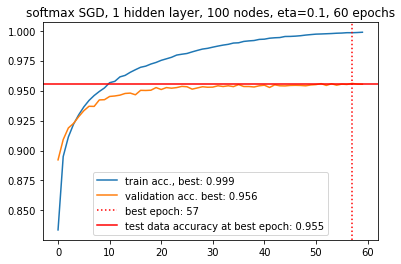

In [18]:
plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('softmax SGD, 1 hidden layer, 100 nodes, eta={}, {} epochs'.format(eta, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

from winsound import Beep
Beep(1000, 100)

<h1>M. Nielsen got a max test accuracy of 97.8%. Here following the same network I got a max test accuracy of 95.5%. </h1>
<h1>Total time=339s</h1>

In [20]:
print(acc)

[0.8337399959564209, 0.8949599862098694, 0.9112600088119507, 0.9219200015068054, 0.9297599792480469, 0.9363999962806702, 0.9417600035667419, 0.9458799958229065, 0.9492599964141846, 0.9522200226783752, 0.9565799832344055, 0.9577000141143799, 0.9614400267601013, 0.9626799821853638, 0.9652600288391113, 0.9674199819564819, 0.9694399833679199, 0.9703999757766724, 0.9721599817276001, 0.9734799861907959, 0.9752399921417236, 0.9764999747276306, 0.9777799844741821, 0.979640007019043, 0.9803400039672852, 0.9809600114822388, 0.9822999835014343, 0.983519971370697, 0.9846400022506714, 0.985260009765625, 0.986240029335022, 0.9871399998664856, 0.9879599809646606, 0.9886000156402588, 0.9896600246429443, 0.9898800253868103, 0.9910200238227844, 0.9914600253105164, 0.9917799830436707, 0.9926999807357788, 0.992900013923645, 0.9937000274658203, 0.9940599799156189, 0.9942600131034851, 0.995140016078949, 0.995199978351593, 0.995419979095459, 0.9957799911499023, 0.9963200092315674, 0.996720016002655, 0.997099

In [22]:
print(loss)

[0.5391616225242615, 0.3466378152370453, 0.29168784618377686, 0.2564140558242798, 0.2300420105457306, 0.20932002365589142, 0.1914234757423401, 0.1770397424697876, 0.1655629277229309, 0.15489311516284943, 0.1442030519247055, 0.13654735684394836, 0.12774406373500824, 0.12100760638713837, 0.11480771750211716, 0.1077815592288971, 0.10197095572948456, 0.09684765338897705, 0.09212876111268997, 0.08777882158756256, 0.08317340910434723, 0.07956305891275406, 0.07557958364486694, 0.071961410343647, 0.06857181340456009, 0.06541956216096878, 0.06256955862045288, 0.05924274027347565, 0.05625591427087784, 0.05393103510141373, 0.051271431148052216, 0.049122005701065063, 0.04641368240118027, 0.044499851763248444, 0.04244166612625122, 0.040490034967660904, 0.03856736049056053, 0.036796391010284424, 0.03532294183969498, 0.033553026616573334, 0.032054588198661804, 0.0303646307438612, 0.029118428006768227, 0.028175998479127884, 0.026741091161966324, 0.025471115484833717, 0.024437986314296722, 0.0234550032

In [24]:
print(val_acc)

[0.8921999931335449, 0.9090999960899353, 0.9187999963760376, 0.9225999712944031, 0.9282000064849854, 0.9332000017166138, 0.9369000196456909, 0.9368000030517578, 0.9422000050544739, 0.9423999786376953, 0.9451000094413757, 0.9455000162124634, 0.9462000131607056, 0.9476000070571899, 0.9478999972343445, 0.9465000033378601, 0.9502000212669373, 0.9501000046730042, 0.9502999782562256, 0.9524999856948853, 0.9509000182151794, 0.9524999856948853, 0.9520000219345093, 0.9524999856948853, 0.953499972820282, 0.9531999826431274, 0.951200008392334, 0.9521999955177307, 0.9531999826431274, 0.9527999758720398, 0.9528999924659729, 0.9539999961853027, 0.9534000158309937, 0.9539999961853027, 0.9532999992370605, 0.9549999833106995, 0.9534000158309937, 0.9534000158309937, 0.953000009059906, 0.9539999961853027, 0.9545000195503235, 0.9526000022888184, 0.954800009727478, 0.9539999961853027, 0.9538999795913696, 0.9542999863624573, 0.9544000029563904, 0.9542999863624573, 0.9539999961853027, 0.9546999931335449, 0.9

In [25]:
print(val_loss)

[0.35073912143707275, 0.30326151847839355, 0.268372118473053, 0.2629871964454651, 0.24077795445919037, 0.22318515181541443, 0.21329687535762787, 0.219068244099617, 0.1994725465774536, 0.19449879229068756, 0.19272157549858093, 0.19230280816555023, 0.18833908438682556, 0.18263183534145355, 0.1886449009180069, 0.18652255833148956, 0.17942674458026886, 0.1808289736509323, 0.17870192229747772, 0.17494475841522217, 0.17882190644741058, 0.17833693325519562, 0.17603185772895813, 0.17372961342334747, 0.1769852489233017, 0.17747178673744202, 0.17983199656009674, 0.1799338310956955, 0.1779390126466751, 0.17720244824886322, 0.17683756351470947, 0.17797541618347168, 0.1756598949432373, 0.17800070345401764, 0.17997153103351593, 0.1810634583234787, 0.18088048696517944, 0.18072675168514252, 0.181837797164917, 0.1830606907606125, 0.18402476608753204, 0.18369269371032715, 0.18360646069049835, 0.18646122515201569, 0.1845647692680359, 0.1892125904560089, 0.188062846660614, 0.18927952647209167, 0.190782114